# E-Commerce Dataset Customer Churn Predictive Model

## Purpose

- To predict the datasets by using machine learning models
- To understand important features in order to be able to be evaluated for reducing churn value

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot
from numpy import where
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_score,roc_auc_score, f1_score, recall_score,roc_curve

%matplotlib inline

In [2]:
# from sklearn.model_selection import RepeatedStratifiedKFold

## Import Dataset 

In [3]:
df = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name = 'E Comm')

In [4]:
df

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

The data consists of 5630 rows and 20 features

- CustomerID : Unique customer ID
- Churn : Churn Flag
- Tenure : Tenure of customer in organization
- PreferredLoginDevice : Preferred login device of customer
- CityTier : City tier
- WarehouseToHome	: Distance in between warehouse to home of customer
- PreferredPaymentMode : Preferred payment method of customer
- Gender : Gender of customer
- HourSpendOnApp : Number of hours spend on mobile application or website
- NumberOfDeviceRegistered : Total number of deceives is registered on particular customer
- PreferedOrderCat : Preferred order category of customer in last month
- SatisfactionScore : Satisfactory score of customer on service
- MaritalStatus : Marital status of customer
- NumberOfAddress	: Total number of added on particular customer
- Complain : Any complaint has been raised in last month
- OrderAmountHikeFromlastYear	 : ercentage increases in order from last year
- CouponUsed : Total number of coupon has been used in last month
- OrderCount : Total number of orders has been places in last month
- DaySinceLastOrder : Day Since last order by customer
- CashbackAmount : Average cashback in last month

In [5]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.groupby(['HourSpendOnApp', 'Churn']).size().reset_index(name='count')

HourSpendOnApp  Churn  count
0             0.0      0      3
1             1.0      0     35
2             2.0      0   1239
3             2.0      1    232
4             3.0      0   2227
5             3.0      1    460
6             4.0      0    978
7             4.0      1    198
8             5.0      0      3

### Checking unique value

In [8]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)

Column: CustomerID
[50001 50002 50003 ... 55628 55629 55630]
Column: Churn
[1 0]
Column: Tenure
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Column: PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']
Column: CityTier
[3 1 2]
Column: WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
Column: PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Column: Gender
['Female' 'Male']
Column: HourSpendOnApp
[ 3.  2. nan  1.  0.  4.  5.]
Column: NumberOfDeviceRegistered
[3 4 5 2 1 6]
Column: PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Column: SatisfactionScore
[2 3 5 4 1]
Column: MaritalStatus
['Single' 'Divorced' 'Married']
Column: NumberOfAddress
[ 9 

### Checking for duplicate values

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().transpose()

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [11]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Fill out NA with median, change data type and remove unnecessary features

In [12]:
for i in df.columns:
    if df[i].isna().sum() > 0 :
        df[i].fillna(df[i].median(), inplace = True)

In [13]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [14]:
df.describe().transpose()

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5630.0     10.134103     8.357951      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5630.0     15.566785     8.345961      5.0   
HourSpendOnApp               5630.0      2.934636     0.705528      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5630.0     15.674600     3.591058     11.0   
CouponUsed                   5630.0      1.716874     1.857640      0.0   
OrderCount                   5630.0      2.961812     2.879248      1.0   
DaySinceLastOrder            5630.0      4.459325     3.570626      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           3.00      9.00     15.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [15]:
df.drop(['CustomerID'],axis=1, inplace=True)
df.drop(['Gender'],axis=1, inplace=True)

In [16]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')
df['Complain'] = df['Complain'].astype('object')

## Feature Enginering

### Create an average cashback feature per order

In [17]:
df['AvgCashbackPerOrder'] = df['CashbackAmount'] / df['OrderCount']

In [18]:
df

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0        1     4.0         Mobile Phone        3              6.0   
1        1     9.0                Phone        1              8.0   
2        1     9.0                Phone        1             30.0   
3        1     0.0                Phone        3             15.0   
4        1     0.0                Phone        1             12.0   
...    ...     ...                  ...      ...              ...   
5625     0    10.0             Computer        1             30.0   
5626     0    13.0         Mobile Phone        1             13.0   
5627     0     1.0         Mobile Phone        1             11.0   
5628     0    23.0             Computer        3              9.0   
5629     0     8.0         Mobile Phone        1             15.0   

     PreferredPaymentMode  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card             3.0                         3   
1                     UPI             3.0                         4   
2              Debit Card             2.0                         4   
3              Debit Card             2.0                         4   
4                      CC             3.0                         3   
...                   ...             ...                       ...   
5625          Credit Card             3.0                         2   
5626          Credit Card             3.0                         5   
5627           Debit Card             3.0                         2   
5628          Credit Card             4.0                         5   
5629          Credit Card             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0           1                         11.0         1.0         1.0   
1           1                         15.0         0.0         1.0   
2           1                         14.0         0.0         1.0   
3           0                         23.0         0.0         1.0   
4           0                         11.0         1.0         1.0   
...       ...                          ...         ...         ...   
5625        0                         18.0         1.0         2.0   
5626        0                         16.0         1.0         2.0   
5627        1                         21.0         1.0         2.0   
5628        0                         15.0         2.0         2.0   
5629        0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  AvgCashbackPerOrder  
0                   5.0          159.93              159.930  
1                   0.0          120.90              120.900  
2                   3.0          120.28              120.280  
3                   3.0          134.07              134.070  
4                   3.0          129.60              129.600  
...                 ...             ...                  ...  
5625                4.0          150.71               75.355  
5626                3.0          224.91  

## Outliers checking and data standardization

In [19]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'AvgCashbackPerOrder']


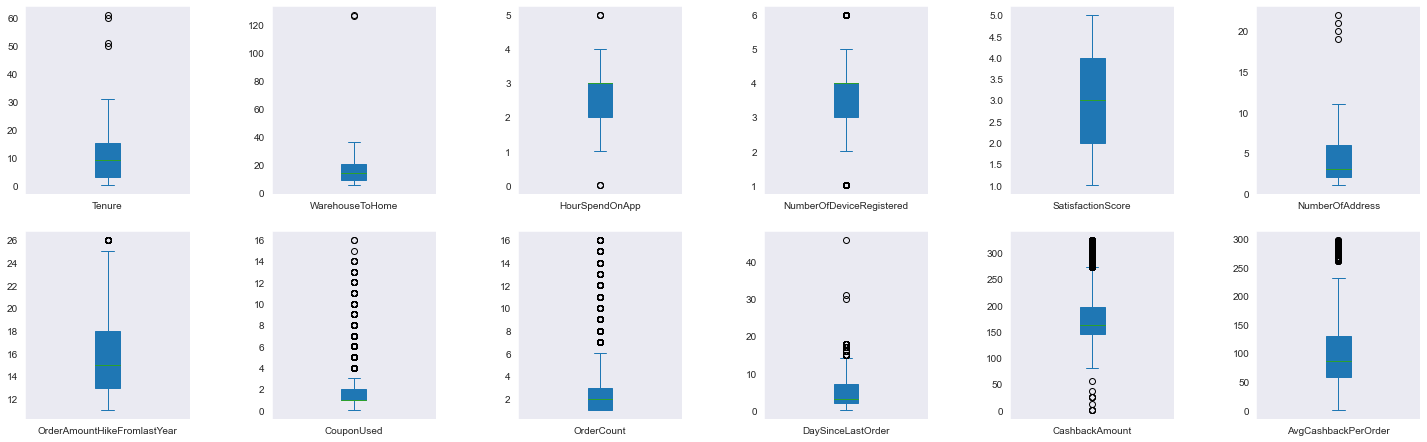

In [20]:
sns.set_style('dark')
df[num].plot(subplots=True, layout=(5,6), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [21]:
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

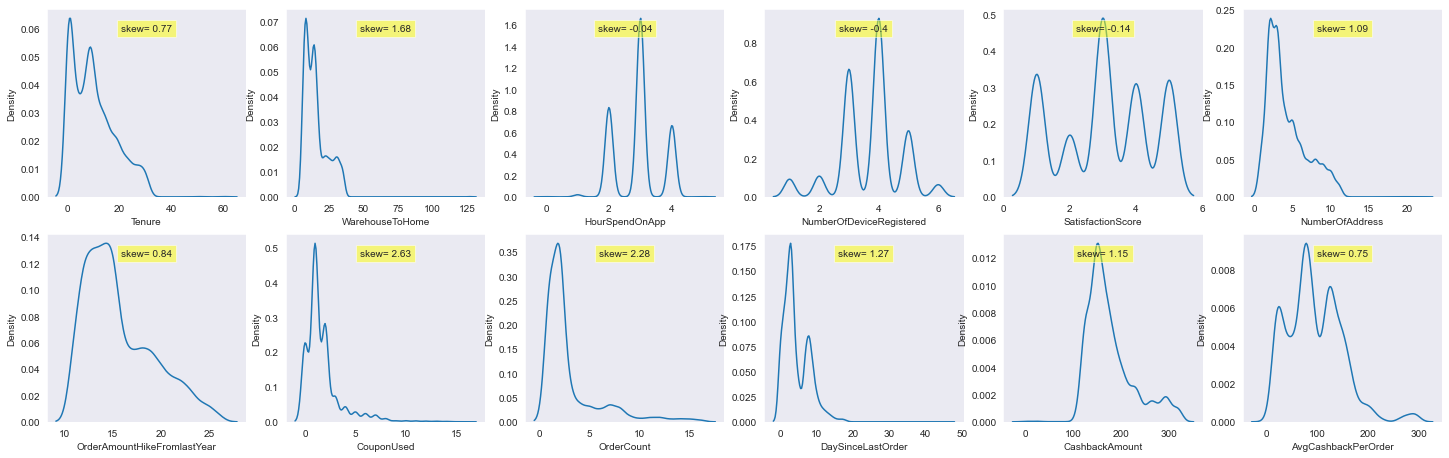

In [22]:
dist_plot(df, num)

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR=Q3-Q1
    lower= Q1-(1.5 * IQR)
    upper= Q3+(1.5 * IQR)
    return lower, upper

for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

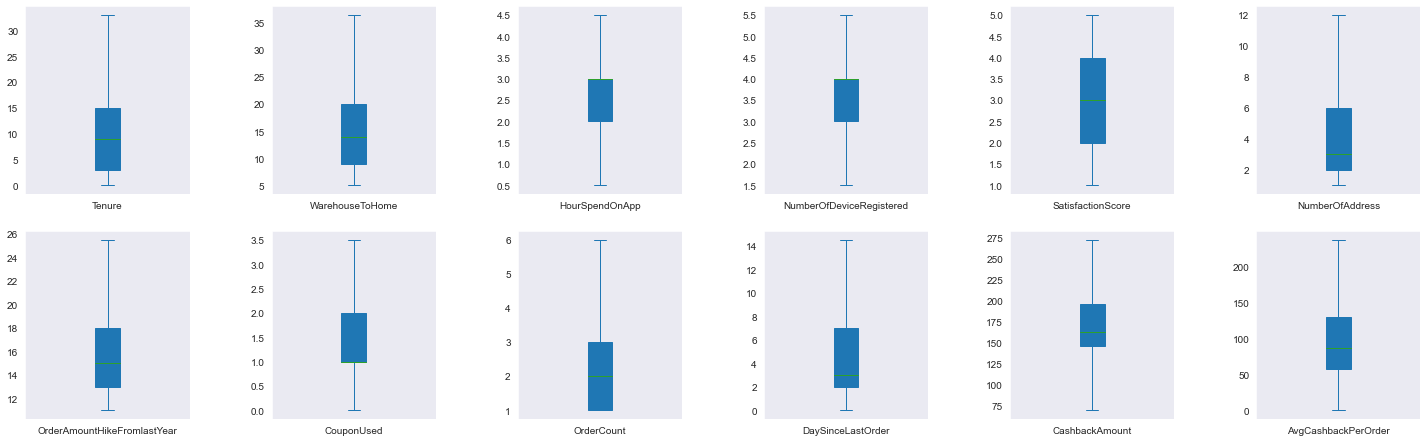

In [24]:
sns.set_style('dark')
df[num].plot(subplots=True, layout=(5,6), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

## EDA

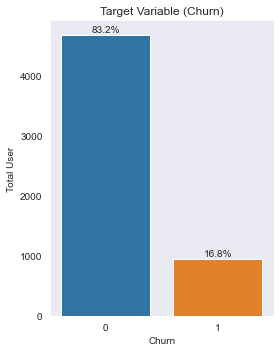

In [25]:
fig, ax = plt.subplots(figsize=(4,5))
ax = sns.countplot(x='Churn', data=df)
plt.ylabel('Total User')
plt.title('Target Variable (Churn)')
total_check = len(df)
for p in ax.patches:
      percentage = f'{100 * p.get_height() / total_check:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Findings :
- The percentage of customers who persist in e-commerce is much higher which is 83.2% as a high percentage
- A low churn percentage indicates customers are satisfied with e-commerce services

In [26]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'AvgCashbackPerOrder']


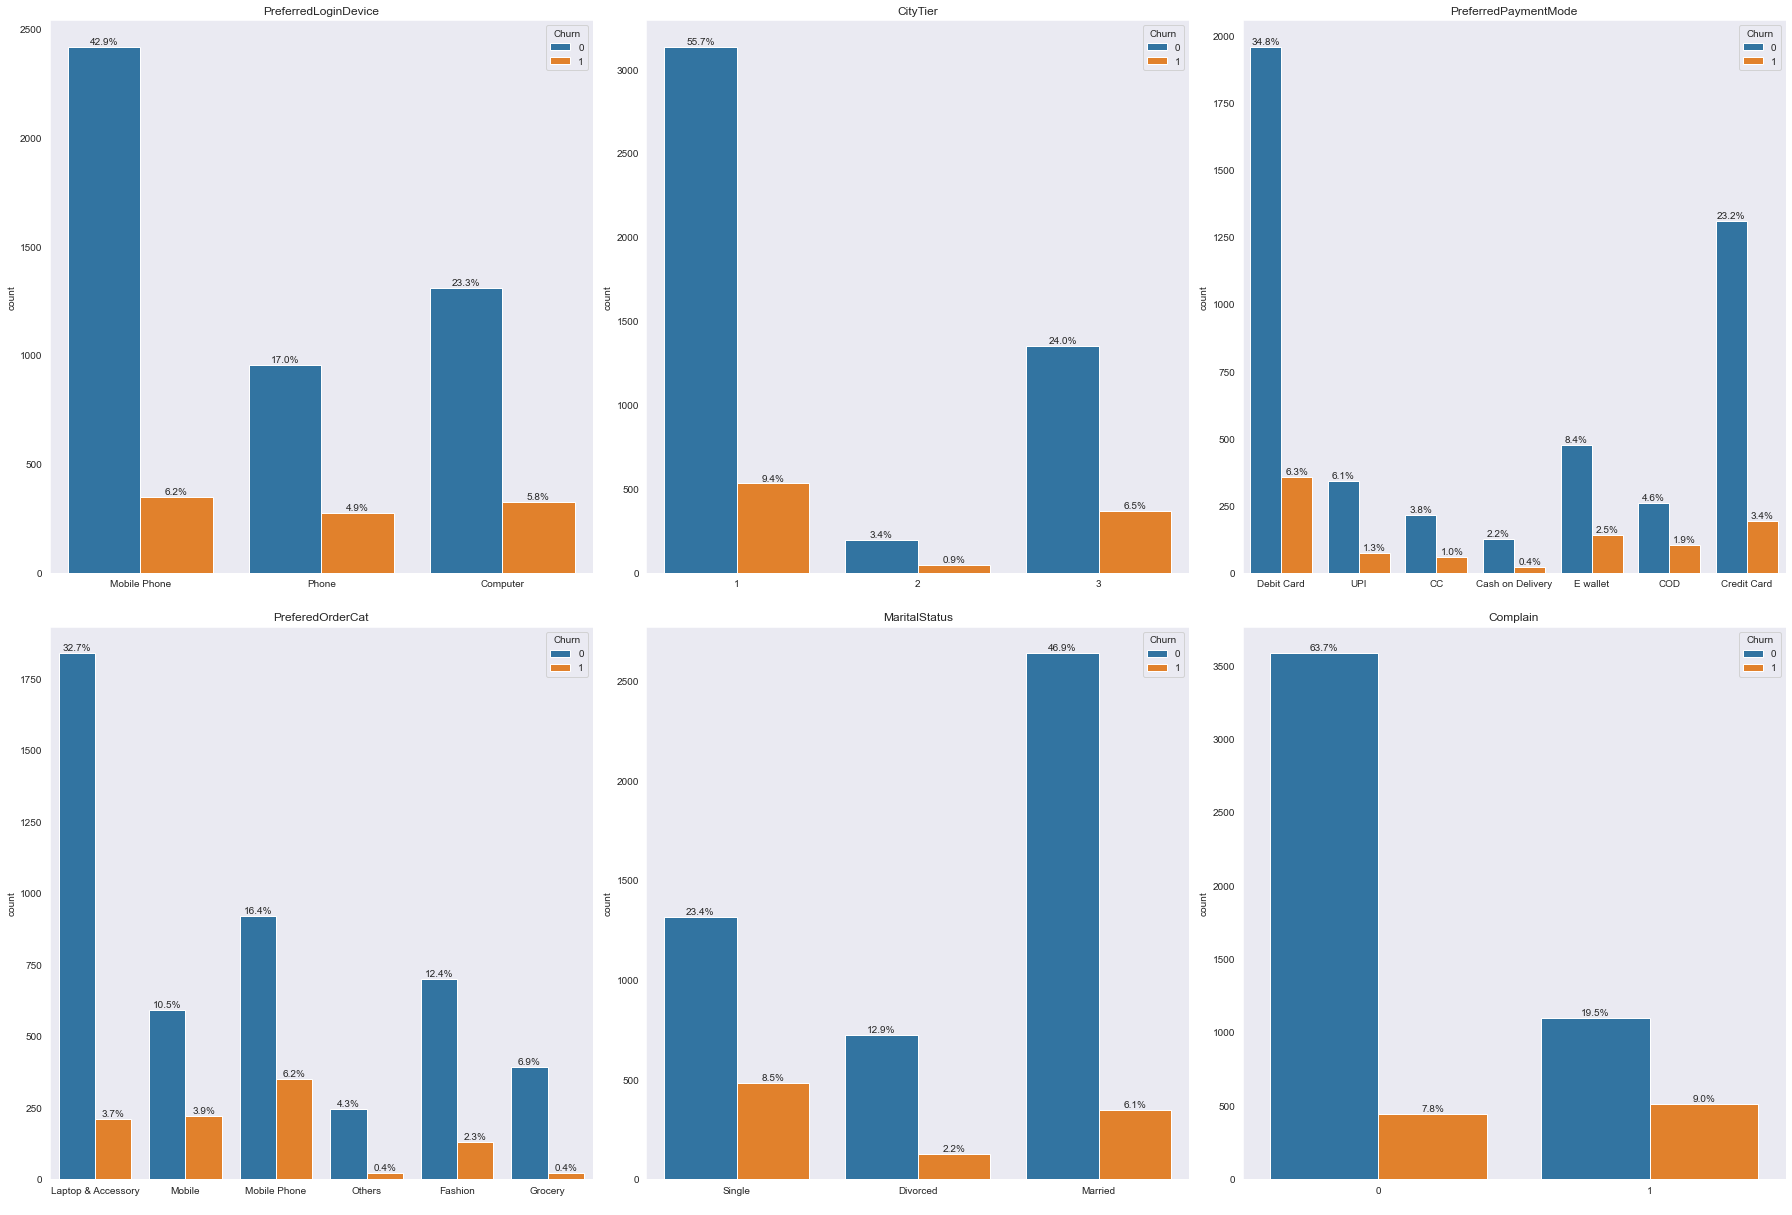

In [27]:
a = 1
plt.figure(figsize=[25,25])
df_n = df.loc[:,['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus','Complain','Churn']]
for i in df_n.iloc[:,:-1].columns:
    plt.subplot(3,3,a)
    a+=1
    ax = sns.countplot(x=i, hue='Churn', data=df_n)
    plt.title(i)
    plt.xlabel(' ')
    total = len(df_n)
    for p in ax.patches:
      percentage = f'{100 * p.get_height() / total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Findings :
- The highest percentage of features for customers who doesn't churn are mobile phone, city tire 1, debit card payment method, male gender, preferred order cat laptop & accessories category,  married, and never complains
- Meanwhile, for each feature, the highest non-persistent customers are similar to those who survive, however, the difference is that they tend to order in the Mobile Phone category, have single status, and often complain.
- Marital status vs preferred order cat, is there a relationship between these two features that affect churn or the relationship to churn?
- Terlihat bahwa customer yang bertahan memilih metode pembayaran tertinggi pada debit card dan debit card, apakah Martial status, metode pembayaran serat tier 1 juga memiliki hubungan satu sama lain dan apakah mempengaruhi churn atau hubungan terhadap churn?
- It can be seen that the customers who doesn't churn choose the highest payment method on debit cards, does Marital status, city tier 1 debit cards also have a relationship with each other, and does it affect churn or the relationship to churn?

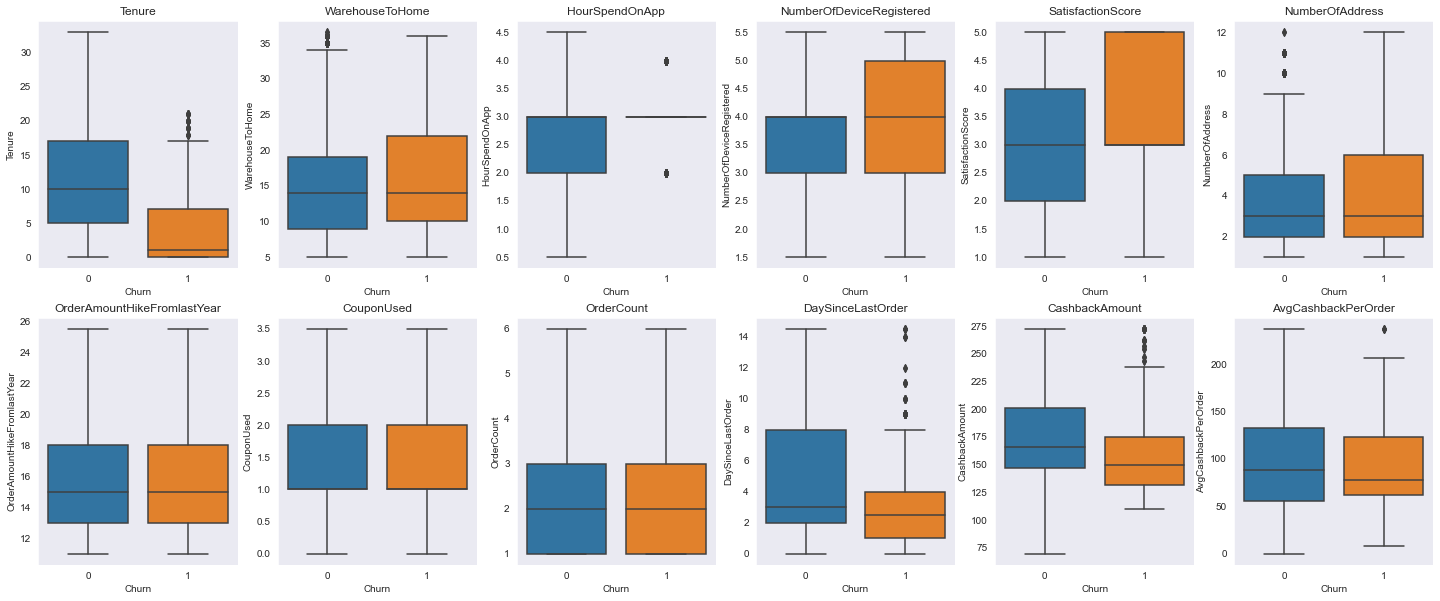

In [28]:
a = 1
df_n_check = df.loc[:,['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
                       'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
                       'DaySinceLastOrder', 'CashbackAmount', 'AvgCashbackPerOrder', 'Churn']]
boxplot_cek = df_n_check.iloc[:,:-1]
fig, axes = plt.subplots(5,6,figsize=(25,10))
for i in boxplot_cek:
    plt.subplot(2,6,a)
    a+=1
    ax = sns.boxplot(y=i, x='Churn', data=df_n_check)
    plt.title(i)

Findings :
- For customers who persist have a long average tenure, which is around 5-17, while customers who churn have an average of 1-6 which indicates that the customers are very fast to churn towards the e-commerce
- The distance from the warehouse to the house is closer for customers who persist compared to those who churn, which means that distance also affects customers to churn, this may be due to higher shipping costs if the distance is far
- The unique thing found is, customers who churn actually have an average satisfaction of 3-5, while customers who persist have an average of 2-4
- Order amount hike from last year, there is no difference between customers who persist and does not indicate that there is no significant change from last year's order, so there must be improvements in order to increase orders every year
- Day since last order user churn is much faster with an average of 1-3 which indicates that churn customers are actually active in shopping 
- It can be seen that the amount of cash back and cash back obtained on each order made by customers who churn is less compared to customers who persist, whether the coupons or cash back given are small or the percentage is small and whether customers who get high cash back buy  goods that are expensive? so that you get the maximum cash back value
- If you look at the Preferred Ordercat, it seems that there is certainly an influence related to the amount of cash back and category orders, because in the previous EDA, the highest order was for customers who persisted, namely the laptop & accessories category which had an expensive selling value, while for customers who had a high churn category of goods on mobile phones that are cheaper, or certainly more cash back is available on laptop products & accessories.

### Create one hot encoding

In [29]:
df1 = pd.get_dummies(data=df, drop_first=True)

In [30]:
df1

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0        4.0              6.0             3.0                       3.0   
1        9.0              8.0             3.0                       4.0   
2        9.0             30.0             2.0                       4.0   
3        0.0             15.0             2.0                       4.0   
4        0.0             12.0             3.0                       3.0   
...      ...              ...             ...                       ...   
5625    10.0             30.0             3.0                       2.0   
5626    13.0             13.0             3.0                       5.0   
5627     1.0             11.0             3.0                       2.0   
5628    23.0              9.0             4.0                       5.0   
5629     8.0             15.0             3.0                       2.0   

      SatisfactionScore  NumberOfAddress  OrderAmountHikeFromlastYear  \
0                   2.0              9.0                         11.0   
1                   3.0              7.0                         15.0   
2                   3.0              6.0                         14.0   
3                   5.0              8.0                         23.0   
4                   5.0              3.0                         11.0   
...                 ...              ...                          ...   
5625                1.0              6.0                         18.0   
5626                5.0              6.0                         16.0   
5627                4.0              3.0                         21.0   
5628                4.0              4.0                         15.0   
5629                3.0              4.0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  ...  \
0            1.0         1.0                5.0  ...   
1            0.0         1.0                0.0  ...   
2            0.0         1.0                3.0  ...   
3            0.0         1.0                3.0  ...   
4            1.0         1.0                3.0  ...   
...          ...         ...                ...  ...   
5625         1.0         2.0                4.0  ...   
5626         1.0         2.0                3.0  ...   
5627         1.0         2.0                4.0  ...   
5628         2.0         2.0                9.0  ...   
5629         2.0         2.0                3.0  ...   

      PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  \
0                                 0                         0   
1                                 0                         1   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   
...                             ...                       ...   
5625                              0                         0   
5626                              0                         0   
5627                              0                         0   
5628                              0                         0   
5629                              0                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                            0                                    1   
1                            0                                    0   
2                            0                                    0   
3                            0                                    1   
4                            0                                    0   
...                        ...                                  ...   
5625                         0                                    1   
5626                         0                                    0   
5627                         0                                    1   
5628                         0                                  

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 5630 non-null   float64
 1   WarehouseToHome                        5630 non-null   float64
 2   HourSpendOnApp                         5630 non-null   float64
 3   NumberOfDeviceRegistered               5630 non-null   float64
 4   SatisfactionScore                      5630 non-null   float64
 5   NumberOfAddress                        5630 non-null   float64
 6   OrderAmountHikeFromlastYear            5630 non-null   float64
 7   CouponUsed                             5630 non-null   float64
 8   OrderCount                             5630 non-null   float64
 9   DaySinceLastOrder                      5630 non-null   float64
 10  CashbackAmount                         5630 non-null   float64
 11  AvgC

## Feature Selection

### Checking correlation 

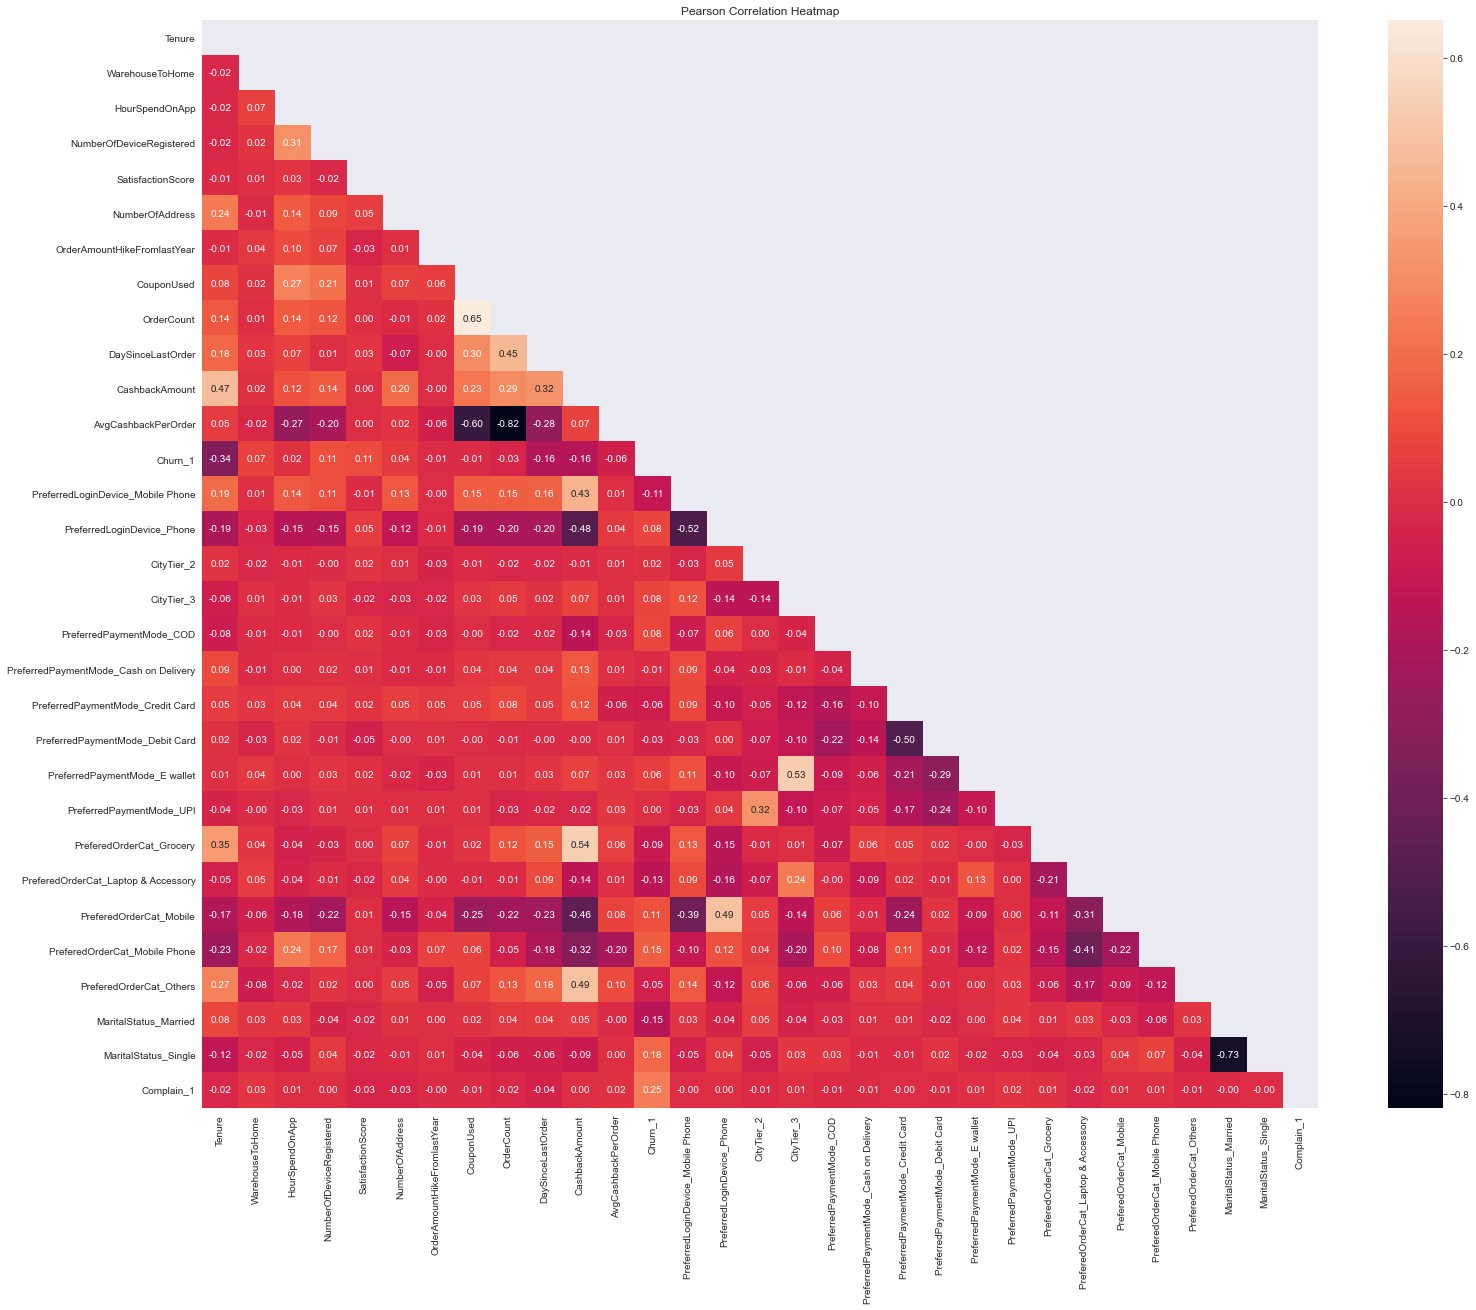

In [32]:
df_corr = df1.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Findings:
- Order count vs coupond
- Cashback amount vs prefered order cat others, prefered order cat grocery, prefered log in by mobile phone
- payment methode e wallet vs city tier 3
- prefered log in by mobile phone vs prefered order cat mobile
- Cashback amount vs tenure
- There are no features with high correlation (Threshold = 0.8)

### Filter Features by Variance

In [33]:
df1.var().sort_values(ascending = False)

AvgCashbackPerOrder                      2590.357549
CashbackAmount                           1942.148734
Tenure                                     68.746216
WarehouseToHome                            65.437232
OrderAmountHikeFromlastYear                12.836620
DaySinceLastOrder                          11.827984
NumberOfAddress                             6.528591
OrderCount                                  2.927893
SatisfactionScore                           1.904937
CouponUsed                                  1.147674
NumberOfDeviceRegistered                    0.887393
HourSpendOnApp                              0.495371
PreferredLoginDevice_Mobile Phone           0.249966
MaritalStatus_Married                       0.249122
PreferredPaymentMode_Debit Card             0.242124
PreferedOrderCat_Laptop & Accessory         0.231578
MaritalStatus_Single                        0.217280
CityTier_3                                  0.212348
Complain_1                                  0.

Findings :
- 10 best features based on variance :
    - AvgCashbackPerOrder                      
    - CashbackAmount                           
    - Tenure                                     
    - WarehouseToHome                           
    - OrderAmountHikeFromlastYear                
    - DaySinceLastOrder                          
    - NumberOfAddress                             
    - OrderCount                                  
    - SatisfactionScore                           
    - CouponUsed                                              
- Of the 10 features, it seems relevant to the EDA that was carried out and the visualization that was carried out on Churn customers
- These features describe the differences and the highest value of churn customers on each feature

In [34]:
df_var = df1.loc[:,['AvgCashbackPerOrder',
   'CashbackAmount',
   'Tenure',
   'WarehouseToHome',
   'OrderAmountHikeFromlastYear',
   'DaySinceLastOrder',
   'NumberOfAddress',
   'OrderCount',
   'SatisfactionScore',
   'CouponUsed',
   'Churn_1']]
df_var

AvgCashbackPerOrder  CashbackAmount  Tenure  WarehouseToHome  \
0                 159.930          159.93     4.0              6.0   
1                 120.900          120.90     9.0              8.0   
2                 120.280          120.28     9.0             30.0   
3                 134.070          134.07     0.0             15.0   
4                 129.600          129.60     0.0             12.0   
...                   ...             ...     ...              ...   
5625               75.355          150.71    10.0             30.0   
5626              112.455          224.91    13.0             13.0   
5627               93.210          186.42     1.0             11.0   
5628               89.450          178.90    23.0              9.0   
5629               84.520          169.04     8.0             15.0   

      OrderAmountHikeFromlastYear  DaySinceLastOrder  NumberOfAddress  \
0                            11.0                5.0              9.0   
1                            15.0                0.0              7.0   
2                            14.0                3.0              6.0   
3                            23.0                3.0              8.0   
4                            11.0                3.0              3.0   
...                           ...                ...              ...   
5625                         18.0                4.0              6.0   
5626                         16.0                3.0              6.0   
5627                         21.0                4.0              3.0   
5628                         15.0                9.0              4.0   
5629                         13.0                3.0              4.0   

      OrderCount  SatisfactionScore  CouponUsed  Churn_1  
0            1.0                2.0         1.0        1  
1            1.0                3.0         0.0        1  
2            1.0                3.0         0.0        1  
3            1.0                5.0         0.0        1  
4            1.0                5.0         1.0        1  
...          ...                ...         ...      ...  
5625         2.0                1.0         1.0        0  
5626         2.0                5.0         1.0        0  
5627         2.0                4.0         1.0        0  
5628         2.0                4.0         2.0        0  
5629         2.0                3.0         2.0        0  

[5630 rows x 11 columns]

In [35]:
cat_0=[]
num_0=[]
for i in df_var.columns:
  if df_var[i].dtype=='float64':
    num_0.append(i)
  else:
    cat_0.append(i)
print('num = ',num_0)
print('cat = ',cat_0)

num =  ['AvgCashbackPerOrder', 'CashbackAmount', 'Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'NumberOfAddress', 'OrderCount', 'SatisfactionScore', 'CouponUsed']
cat =  ['Churn_1']


## Data Preprocessing

### Scaling data to reduce skew

In [36]:
scaler = StandardScaler()
df_scaler_var_Std = pd.DataFrame(scaler.fit_transform(df[num_0].astype('int64')), columns=num_0, index=df.index)
df_scaler_var_Std.head()

AvgCashbackPerOrder  CashbackAmount    Tenure  WarehouseToHome  \
0             1.271313       -0.359303 -0.737959        -1.178839   
1             0.505260       -1.243743 -0.134866        -0.931564   
2             0.505260       -1.243743 -0.134866         1.788463   
3             0.780253       -0.926252 -1.220433        -0.066101   
4             0.682041       -1.039641 -1.220433        -0.437014   

   OrderAmountHikeFromlastYear  DaySinceLastOrder  NumberOfAddress  \
0                    -1.306065           0.168378         1.875626   
1                    -0.187078          -1.292281         1.092812   
2                    -0.466825          -0.415886         0.701405   
3                     2.050898          -0.415886         1.484219   
4                    -1.306065          -0.415886        -0.472817   

   OrderCount  SatisfactionScore  CouponUsed  
0   -0.888745          -0.772992   -0.396172  
1   -0.888745          -0.048392   -1.426401  
2   -0.888745          -0.048392   -1.426401  
3   -0.888745           1.400807   -1.426401  
4   -0.888745           1.400807   -0.396172

In [37]:
df_scaler_var = pd.concat([df_scaler_var_Std, df_var.drop(axis=1, columns=num_0)],axis=1)
df_scaler_var

AvgCashbackPerOrder  CashbackAmount    Tenure  WarehouseToHome  \
0                1.271313       -0.359303 -0.737959        -1.178839   
1                0.505260       -1.243743 -0.134866        -0.931564   
2                0.505260       -1.243743 -0.134866         1.788463   
3                0.780253       -0.926252 -1.220433        -0.066101   
4                0.682041       -1.039641 -1.220433        -0.437014   
...                   ...             ...       ...              ...   
5625            -0.378648       -0.563404 -0.014247         1.788463   
5626             0.348121        1.114765  0.347609        -0.313376   
5627            -0.025085        0.253002 -1.099814        -0.560651   
5628            -0.103655        0.071579  1.553794        -0.807927   
5629            -0.201867       -0.132523 -0.255484        -0.066101   

      OrderAmountHikeFromlastYear  DaySinceLastOrder  NumberOfAddress  \
0                       -1.306065           0.168378         1.875626   
1                       -0.187078          -1.292281         1.092812   
2                       -0.466825          -0.415886         0.701405   
3                        2.050898          -0.415886         1.484219   
4                       -1.306065          -0.415886        -0.472817   
...                           ...                ...              ...   
5625                     0.652163          -0.123754         0.701405   
5626                     0.092669          -0.415886         0.701405   
5627                     1.491404          -0.123754        -0.472817   
5628                    -0.187078           1.336905        -0.081410   
5629                    -0.746572          -0.415886        -0.081410   

      OrderCount  SatisfactionScore  CouponUsed  Churn_1  
0      -0.888745          -0.772992   -0.396172        1  
1      -0.888745          -0.048392   -1.426401        1  
2      -0.888745          -0.048392   -1.426401        1  
3      -0.888745           1.400807   -1.426401        1  
4      -0.888745           1.400807   -0.396172        1  
...          ...                ...         ...      ...  
5625   -0.304276          -1.497592   -0.396172        0  
5626   -0.304276           1.400807   -0.396172        0  
5627   -0.304276           0.676207   -0.396172        0  
5628   -0.304276           0.676207    0.634057        0  
5629   -0.304276          -0.048392    0.634057        0  

[5630 rows x 11 columns]

In [38]:
X = df_scaler_var.drop(['Churn_1'], axis = 1)
y = df_scaler_var['Churn_1']

In [39]:
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## SMOTE for imbalanced data

In [40]:
target = df_scaler_var['Churn_1'].value_counts().reset_index()
target.rename(columns={'index':'Churn_1','Churn_1':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

Churn_1  freq  percentage
0        0  4682       83.16
1        1   948       16.84

In [41]:
sm = over_sampling.SMOTE(random_state=42)
X_train_SMT_var, y_train_SMT_var = sm.fit_sample(X_train_var, y_train_var.ravel())

In [42]:
print('Before SMOTE:', Counter(y_train_var))
print('After SMOTE:', Counter(y_train_SMT_var))

Before SMOTE: Counter({0: 3511, 1: 711})
After SMOTE: Counter({0: 3511, 1: 3511})


### Checking overfitting and Underfitting 

In [43]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[10]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.06524895876646042


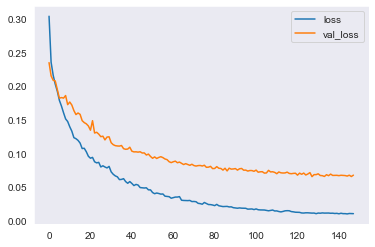

In [44]:
history = model.fit(
    X_train_SMT_var, y_train_SMT_var,
    validation_data=(X_test_var, y_test_var),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], 
    verbose=0,  
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Findings :
- For the 10 best features, the data variance filter looks normal
- The decrease in loss is balanced by a decrease in val_los which indicates the data is not really overfitting or underfitting

### Feature Selection using KBest and Chi Square 

In [45]:
X = df1.drop('Churn_1',axis=1)
y = df1['Churn_1']

In [46]:
selector = SelectKBest(score_func=chi2, k=10)
selector.fit_transform(X, y)

impFeature_1 = pd.Series(data = selector.scores_, index = X.columns).sort_values(ascending = False)

fig = go.Figure(go.Bar(
            x = impFeature_1.index,
            y = impFeature_1.values
            ))

fig.update_layout({"title": {"text": "Feature Importance using KBest",
                             "font": {"size": 20}}})
fig.show()

In [47]:
impFeature_1

Tenure                                   4412.797490
CashbackAmount                           1600.159780
AvgCashbackPerOrder                       468.911025
DaySinceLastOrder                         396.949765
Complain_1                                252.004099
WarehouseToHome                           128.192474
MaritalStatus_Single                      125.392983
PreferedOrderCat_Mobile Phone             103.898547
PreferedOrderCat_Laptop & Accessory        63.663401
PreferedOrderCat_Mobile                    61.956169
MaritalStatus_Married                      60.304991
PreferedOrderCat_Grocery                   41.883820
SatisfactionScore                          38.902557
PreferredPaymentMode_COD                   37.090298
PreferredLoginDevice_Mobile Phone          35.707123
PreferredLoginDevice_Phone                 27.395656
CityTier_3                                 25.258967
PreferredPaymentMode_Credit Card           16.981775
PreferedOrderCat_Others                    16.

Findings :
- 10 best features based on KBest using chi2 :
    - Tenure                                   
    - CashbackAmount                           
    - AvgCashbackPerOrder                       
    - DaySinceLastOrder                         
    - Complain_1                               
    - WarehouseToHome                           
    - MaritalStatus_Single                      
    - PreferedOrderCat_Mobile Phone             
    - PreferedOrderCat_Laptop & Accessory        
    - PreferedOrderCat_Mobile                           
- Of the 10 features, it seems relevant to the EDA that was carried out and the visualization that was carried out on Churn customers
- These features describe the differences and the highest value of churn customers on each feature

In [48]:
df_KBest = df1.loc[:,['Tenure',
   'CashbackAmount',
   'AvgCashbackPerOrder',
   'DaySinceLastOrder',
   'Complain_1',
   'WarehouseToHome',
   'MaritalStatus_Single',
   'PreferedOrderCat_Mobile Phone',
   'PreferedOrderCat_Laptop & Accessory',
   'PreferedOrderCat_Mobile',
   'Churn_1']]
df_KBest

Tenure  CashbackAmount  AvgCashbackPerOrder  DaySinceLastOrder  \
0        4.0          159.93              159.930                5.0   
1        9.0          120.90              120.900                0.0   
2        9.0          120.28              120.280                3.0   
3        0.0          134.07              134.070                3.0   
4        0.0          129.60              129.600                3.0   
...      ...             ...                  ...                ...   
5625    10.0          150.71               75.355                4.0   
5626    13.0          224.91              112.455                3.0   
5627     1.0          186.42               93.210                4.0   
5628    23.0          178.90               89.450                9.0   
5629     8.0          169.04               84.520                3.0   

      Complain_1  WarehouseToHome  MaritalStatus_Single  \
0              1              6.0                     1   
1              1              8.0                     1   
2              1             30.0                     1   
3              0             15.0                     1   
4              0             12.0                     1   
...          ...              ...                   ...   
5625           0             30.0                     0   
5626           0             13.0                     0   
5627           1             11.0                     0   
5628           0              9.0                     0   
5629           0             15.0                     0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Laptop & Accessory  \
0                                 0                                    1   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    0   
...                             ...                                  ...   
5625                              0                                    1   
5626                              0                                    0   
5627                              0                                    1   
5628                              0                                    1   
5629                              0                                    1   

      PreferedOrderCat_Mobile  Churn_1  
0                           0        1  
1                           1        1  
2                           1        1  
3                           0        1  
4                           1        1  
...                       ...      ...  
5625                        0        0  
5626                        0        0  
5627                        0        0  
5628                        0        0  
5629                        0        0  

[5630 rows x 11 columns]

In [49]:
cat_1=[]
num_1=[]
for i in df_KBest.columns:
  if df_KBest[i].dtype=='float64':
    num_1.append(i)
  else:
    cat_1.append(i)## Data Preprocessing
print('num = ',num_1)
print('cat = ',cat_1)

num =  ['Tenure', 'CashbackAmount', 'AvgCashbackPerOrder', 'DaySinceLastOrder', 'WarehouseToHome']
cat =  ['Complain_1', 'MaritalStatus_Single', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'Churn_1']


## Data Preprocessing

### Scaling data to reduce skew

In [50]:
scaler = StandardScaler()
df_scaler_KBest_Std = pd.DataFrame(scaler.fit_transform(df[num_1].astype('int64')), columns=num_1, index=df.index)
df_scaler_KBest_Std.head()

Tenure  CashbackAmount  AvgCashbackPerOrder  DaySinceLastOrder  \
0 -0.737959       -0.359303             1.271313           0.168378   
1 -0.134866       -1.243743             0.505260          -1.292281   
2 -0.134866       -1.243743             0.505260          -0.415886   
3 -1.220433       -0.926252             0.780253          -0.415886   
4 -1.220433       -1.039641             0.682041          -0.415886   

   WarehouseToHome  
0        -1.178839  
1        -0.931564  
2         1.788463  
3        -0.066101  
4        -0.437014

In [51]:
df_scaler_KBest = pd.concat([df_scaler_KBest_Std, df_KBest.drop(axis=1, columns=num_1)],axis=1)
df_scaler_KBest

Tenure  CashbackAmount  AvgCashbackPerOrder  DaySinceLastOrder  \
0    -0.737959       -0.359303             1.271313           0.168378   
1    -0.134866       -1.243743             0.505260          -1.292281   
2    -0.134866       -1.243743             0.505260          -0.415886   
3    -1.220433       -0.926252             0.780253          -0.415886   
4    -1.220433       -1.039641             0.682041          -0.415886   
...        ...             ...                  ...                ...   
5625 -0.014247       -0.563404            -0.378648          -0.123754   
5626  0.347609        1.114765             0.348121          -0.415886   
5627 -1.099814        0.253002            -0.025085          -0.123754   
5628  1.553794        0.071579            -0.103655           1.336905   
5629 -0.255484       -0.132523            -0.201867          -0.415886   

      WarehouseToHome  Complain_1  MaritalStatus_Single  \
0           -1.178839           1                     1   
1           -0.931564           1                     1   
2            1.788463           1                     1   
3           -0.066101           0                     1   
4           -0.437014           0                     1   
...               ...         ...                   ...   
5625         1.788463           0                     0   
5626        -0.313376           0                     0   
5627        -0.560651           1                     0   
5628        -0.807927           0                     0   
5629        -0.066101           0                     0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Laptop & Accessory  \
0                                 0                                    1   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    0   
...                             ...                                  ...   
5625                              0                                    1   
5626                              0                                    0   
5627                              0                                    1   
5628                              0                                    1   
5629                              0                                    1   

      PreferedOrderCat_Mobile  Churn_1  
0                           0        1  
1                           1        1  
2                           1        1  
3                           0        1  
4                           1        1  
...                       ...      ...  
5625                        0        0  
5626                        0        0  
5627                        0        0  
5628                        0        0  
5629                        0        0  

[5630 rows x 11 columns]

In [52]:
X = df_scaler_KBest.drop(['Churn_1'], axis = 1)
y = df_scaler_KBest['Churn_1']

In [53]:
 X_train_KBest, X_test_KBest, y_train_KBest, y_test_KBest = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## SMOTE for imbalanced data

In [54]:
target = df_scaler_KBest['Churn_1'].value_counts().reset_index()
target.rename(columns={'index':'Churn_1','Churn_1':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

Churn_1  freq  percentage
0        0  4682       83.16
1        1   948       16.84

In [55]:
sm = over_sampling.SMOTE(random_state=42)
X_train_SMT_KBest, y_train_SMT_KBest = sm.fit_sample(X_train_KBest, y_train_KBest.ravel())

In [56]:
print('Before SMOTE:', Counter(y_train_KBest))
print('After SMOTE:', Counter(y_train_SMT_KBest))

Before SMOTE: Counter({0: 3511, 1: 711})
After SMOTE: Counter({0: 3511, 1: 3511})


In [57]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[10]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.06684151291847229


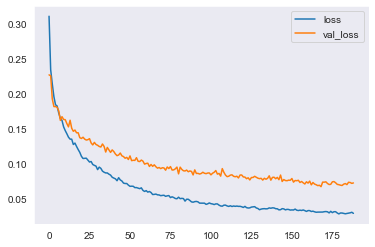

In [58]:
history = model.fit(
    X_train_SMT_KBest, y_train_SMT_KBest,
    validation_data=(X_test_KBest, y_test_KBest),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Findings :
- For the 10 best features, the data variance filter looks normal
- The decrease in loss is balanced by a decrease in val_los which indicates the data is really not overfitting or underfitting

###  Feature selection using feature importances Random Forest Classifier

In [59]:
X = df1.drop('Churn_1',axis=1)
y = df1['Churn_1']

In [60]:
clf = RandomForestClassifier(n_estimators = 200,random_state = 0).fit(X,y)

impFeature = pd.Series(data = clf.feature_importances_, index = X.columns).sort_values(ascending = False)

fig = go.Figure(go.Bar(
            x = impFeature.index,
            y = impFeature.values
            ))

fig.update_layout({"title": {"text": "Feature Importance using Random Forest Classifier",
                             "font": {"size": 20}}})
fig.show()


In [61]:
impFeature

Tenure                                   0.206522
CashbackAmount                           0.093387
AvgCashbackPerOrder                      0.081717
WarehouseToHome                          0.068336
Complain_1                               0.060932
NumberOfAddress                          0.060305
DaySinceLastOrder                        0.059384
OrderAmountHikeFromlastYear              0.053916
SatisfactionScore                        0.044505
NumberOfDeviceRegistered                 0.033398
MaritalStatus_Single                     0.024898
CouponUsed                               0.019536
OrderCount                               0.019390
CityTier_3                               0.019146
HourSpendOnApp                           0.017474
PreferedOrderCat_Laptop & Accessory      0.014748
PreferredPaymentMode_Debit Card          0.014067
MaritalStatus_Married                    0.013187
PreferredLoginDevice_Mobile Phone        0.012583
PreferredPaymentMode_Credit Card         0.011510


Findings :
- 10 best features based on RandomForest Classifier :
    - Tenure                                  
    - CashbackAmount                          
    - AvgCashbackPerOrder                      
    - WarehouseToHome                         
    - Complain_1                               
    - NumberOfAddress                         
    - DaySinceLastOrder                        
    - OrderAmountHikeFromlastYear              
    - SatisfactionScore                        
    - NumberOfDeviceRegistered                 
- Of the 10 features, it seems relevant to the EDA that was carried out and the visualization that was carried out on Churn customers
- These features describe the differences and the highest value of churn customers on each feature

In [62]:
df_rf = df1.loc[:,['Tenure',
   'CashbackAmount',
   'AvgCashbackPerOrder',
   'WarehouseToHome',
   'Complain_1',
   'NumberOfAddress',
   'DaySinceLastOrder',
   'OrderAmountHikeFromlastYear',
   'SatisfactionScore',
   'NumberOfDeviceRegistered',
   'Churn_1']]
df_rf

Tenure  CashbackAmount  AvgCashbackPerOrder  WarehouseToHome  \
0        4.0          159.93              159.930              6.0   
1        9.0          120.90              120.900              8.0   
2        9.0          120.28              120.280             30.0   
3        0.0          134.07              134.070             15.0   
4        0.0          129.60              129.600             12.0   
...      ...             ...                  ...              ...   
5625    10.0          150.71               75.355             30.0   
5626    13.0          224.91              112.455             13.0   
5627     1.0          186.42               93.210             11.0   
5628    23.0          178.90               89.450              9.0   
5629     8.0          169.04               84.520             15.0   

      Complain_1  NumberOfAddress  DaySinceLastOrder  \
0              1              9.0                5.0   
1              1              7.0                0.0   
2              1              6.0                3.0   
3              0              8.0                3.0   
4              0              3.0                3.0   
...          ...              ...                ...   
5625           0              6.0                4.0   
5626           0              6.0                3.0   
5627           1              3.0                4.0   
5628           0              4.0                9.0   
5629           0              4.0                3.0   

      OrderAmountHikeFromlastYear  SatisfactionScore  \
0                            11.0                2.0   
1                            15.0                3.0   
2                            14.0                3.0   
3                            23.0                5.0   
4                            11.0                5.0   
...                           ...                ...   
5625                         18.0                1.0   
5626                         16.0                5.0   
5627                         21.0                4.0   
5628                         15.0                4.0   
5629                         13.0                3.0   

      NumberOfDeviceRegistered  Churn_1  
0                          3.0        1  
1                          4.0        1  
2                          4.0        1  
3                          4.0        1  
4                          3.0        1  
...                        ...      ...  
5625                       2.0        0  
5626                       5.0        0  
5627                       2.0        0  
5628                       5.0        0  
5629                       2.0        0  

[5630 rows x 11 columns]

In [63]:
cat_2=[]
num_2=[]
for i in df_rf.columns:
  if df_rf[i].dtype=='float64':
    num_2.append(i)
  else:
    cat_2.append(i)
print('num = ',num_2)
print('cat = ',cat_2)

num =  ['Tenure', 'CashbackAmount', 'AvgCashbackPerOrder', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'SatisfactionScore', 'NumberOfDeviceRegistered']
cat =  ['Complain_1', 'Churn_1']


## Data Preprocessing

### Scaling data to reduce skew

In [64]:
scaler = StandardScaler()
df_rf_Std = pd.DataFrame(scaler.fit_transform(df[num_2].astype('int64')), columns=num_2, index=df.index)
df_rf_Std.head()

Tenure  CashbackAmount  AvgCashbackPerOrder  WarehouseToHome  \
0 -0.737959       -0.359303             1.271313        -1.178839   
1 -0.134866       -1.243743             0.505260        -0.931564   
2 -0.134866       -1.243743             0.505260         1.788463   
3 -1.220433       -0.926252             0.780253        -0.066101   
4 -1.220433       -1.039641             0.682041        -0.437014   

   NumberOfAddress  DaySinceLastOrder  OrderAmountHikeFromlastYear  \
0         1.875626           0.168378                    -1.306065   
1         1.092812          -1.292281                    -0.187078   
2         0.701405          -0.415886                    -0.466825   
3         1.484219          -0.415886                     2.050898   
4        -0.472817          -0.415886                    -1.306065   

   SatisfactionScore  NumberOfDeviceRegistered  
0          -0.772992                 -0.679752  
1          -0.048392                  0.349843  
2          -0.048392                  0.349843  
3           1.400807                  0.349843  
4           1.400807                 -0.679752

In [65]:
df_scaler_rf = pd.concat([df_rf_Std, df_rf.drop(axis=1, columns=num_2)],axis=1)
df_scaler_rf

Tenure  CashbackAmount  AvgCashbackPerOrder  WarehouseToHome  \
0    -0.737959       -0.359303             1.271313        -1.178839   
1    -0.134866       -1.243743             0.505260        -0.931564   
2    -0.134866       -1.243743             0.505260         1.788463   
3    -1.220433       -0.926252             0.780253        -0.066101   
4    -1.220433       -1.039641             0.682041        -0.437014   
...        ...             ...                  ...              ...   
5625 -0.014247       -0.563404            -0.378648         1.788463   
5626  0.347609        1.114765             0.348121        -0.313376   
5627 -1.099814        0.253002            -0.025085        -0.560651   
5628  1.553794        0.071579            -0.103655        -0.807927   
5629 -0.255484       -0.132523            -0.201867        -0.066101   

      NumberOfAddress  DaySinceLastOrder  OrderAmountHikeFromlastYear  \
0            1.875626           0.168378                    -1.306065   
1            1.092812          -1.292281                    -0.187078   
2            0.701405          -0.415886                    -0.466825   
3            1.484219          -0.415886                     2.050898   
4           -0.472817          -0.415886                    -1.306065   
...               ...                ...                          ...   
5625         0.701405          -0.123754                     0.652163   
5626         0.701405          -0.415886                     0.092669   
5627        -0.472817          -0.123754                     1.491404   
5628        -0.081410           1.336905                    -0.187078   
5629        -0.081410          -0.415886                    -0.746572   

      SatisfactionScore  NumberOfDeviceRegistered  Complain_1  Churn_1  
0             -0.772992                 -0.679752           1        1  
1             -0.048392                  0.349843           1        1  
2             -0.048392                  0.349843           1        1  
3              1.400807                  0.349843           0        1  
4              1.400807                 -0.679752           0        1  
...                 ...                       ...         ...      ...  
5625          -1.497592                 -1.709348           0        0  
5626           1.400807                  1.379438           0        0  
5627           0.676207                 -1.709348           1        0  
5628           0.676207                  1.379438           0        0  
5629          -0.048392                 -1.709348           0        0  

[5630 rows x 11 columns]

In [66]:
X = df_scaler_rf.drop(['Churn_1'], axis = 1)
y = df_scaler_rf['Churn_1']

In [67]:
 X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## SMOTE for imbalanced data

In [68]:
target = df_scaler_rf['Churn_1'].value_counts().reset_index()
target.rename(columns={'index':'Churn_1','Churn_1':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

Churn_1  freq  percentage
0        0  4682       83.16
1        1   948       16.84

In [69]:
sm = over_sampling.SMOTE(random_state=42)
X_train_SMT_rf, y_train_SMT_rf = sm.fit_sample(X_train_rf, y_train_rf.ravel())

In [70]:
print('Before SMOTE:', Counter(y_train_rf))
print('After SMOTE:', Counter(y_train_SMT_rf))

Before SMOTE: Counter({0: 3511, 1: 711})
After SMOTE: Counter({0: 3511, 1: 3511})


### Checking overfitting and Underfitting 

In [71]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20,
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[10]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.03499496355652809


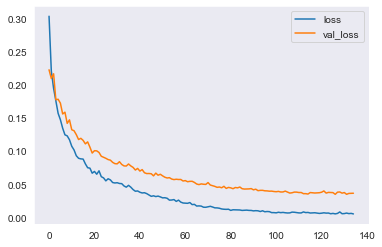

In [72]:
history = model.fit(
    X_train_SMT_rf, y_train_SMT_rf,
    validation_data=(X_test_rf, y_test_rf),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Findings :

- For the 10 best features, the data variance filter looks normal
- The decrease in loss is balanced by a decrease in val_los which indicates the data is not overfitting or underfitting
- The Random Forest Classifier feature importance is much better than Fiter Variances and KBest

### Feature Selection Using a Wrapper

In [73]:
X = df1.drop('Churn_1',axis=1)
y = df1['Churn_1']

In [74]:
cv = KFold(n_splits=10, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

sfs1 = SFS(classifier_pipeline, 
           k_features=30, 
           forward=True, 
           scoring='neg_mean_squared_error',
           cv=cv)

X = df1.drop(columns='Churn_1')

sfs1.fit(X,y)

sfs1.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([-0.14005329, -0.12076377, -0.12539964, -0.12458259, -0.12222025,
         -0.13580817, -0.12584369, -0.12101243, -0.12525755, -0.12474245]),
  'avg_score': -0.1265683836589698,
  'feature_names': ('AvgCashbackPerOrder',)},
 2: {'feature_idx': (0, 11),
  'cv_scores': array([-0.10552398, -0.10396092, -0.0979929 , -0.10390764, -0.0971048 ,
         -0.10383659, -0.09403197, -0.09      , -0.09534636, -0.08493783]),
  'avg_score': -0.09766429840142098,
  'feature_names': ('Tenure', 'AvgCashbackPerOrder')},
 3: {'feature_idx': (0, 11, 29),
  'cv_scores': array([-0.09960924, -0.08937833, -0.08861456, -0.09579041, -0.08774423,
         -0.09449378, -0.08934281, -0.08335702, -0.09019538, -0.08365897]),
  'avg_score': -0.09021847246891654,
  'feature_names': ('Tenure', 'AvgCashbackPerOrder', 'Complain_1')},
 4: {'feature_idx': (0, 11, 15, 29),
  'cv_scores': array([-0.09202487, -0.08909414, -0.08165187, -0.08884547, -0.0859325 ,
         -0.085825

Findings :
- 14 best features based on Wrapper :
    - Tenure
    - WarehouseToHome
    - SatisfactionScore
    - NumberOfAddress
    - OrderAmountHikeFromlastYear
    - CashbackAmount
    - AvgCashbackPerOrder
    - CityTier_2
    - CityTier_3
    - PreferedOrderCat_Grocery
    - PreferedOrderCat_Laptop & Accessory
    - PreferedOrderCat_Others
    - MaritalStatus_Single
    - Complain_1' 
- Of the 10 features, it seems relevant to the EDA that was carried out and the visualization that was carried out on Churn customers with avg_score MSE : -0.06552753108348136
- These features describe the differences and the highest value of churn customers on each feature

In [75]:
df_Wrapper = df1.loc[:,['Tenure',
   'WarehouseToHome',
   'SatisfactionScore',
   'NumberOfAddress',
   'OrderAmountHikeFromlastYear',
   'CashbackAmount',
   'AvgCashbackPerOrder',
   'CityTier_3', 'CityTier_2',
   'PreferedOrderCat_Grocery',
   'PreferedOrderCat_Laptop & Accessory',
   'PreferedOrderCat_Others',
   'MaritalStatus_Single',
   'Complain_1', 'Churn_1']]
df_Wrapper

Tenure  WarehouseToHome  SatisfactionScore  NumberOfAddress  \
0        4.0              6.0                2.0              9.0   
1        9.0              8.0                3.0              7.0   
2        9.0             30.0                3.0              6.0   
3        0.0             15.0                5.0              8.0   
4        0.0             12.0                5.0              3.0   
...      ...              ...                ...              ...   
5625    10.0             30.0                1.0              6.0   
5626    13.0             13.0                5.0              6.0   
5627     1.0             11.0                4.0              3.0   
5628    23.0              9.0                4.0              4.0   
5629     8.0             15.0                3.0              4.0   

      OrderAmountHikeFromlastYear  CashbackAmount  AvgCashbackPerOrder  \
0                            11.0          159.93              159.930   
1                            15.0          120.90              120.900   
2                            14.0          120.28              120.280   
3                            23.0          134.07              134.070   
4                            11.0          129.60              129.600   
...                           ...             ...                  ...   
5625                         18.0          150.71               75.355   
5626                         16.0          224.91              112.455   
5627                         21.0          186.42               93.210   
5628                         15.0          178.90               89.450   
5629                         13.0          169.04               84.520   

      CityTier_3  CityTier_2  PreferedOrderCat_Grocery  \
0              1           0                         0   
1              0           0                         0   
2              0           0                         0   
3              1           0                         0   
4              0           0                         0   
...          ...         ...                       ...   
5625           0           0                         0   
5626           0           0                         0   
5627           0           0                         0   
5628           1           0                         0   
5629           0           0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Others  \
0                                       1                        0   
1                                       0                        0   
2                                       0                        0   
3                                       1                        0   
4                                       0                        0   
...                                   ...                      ...   
5625                                    1                        0   
5626                                    0                        0   
5627                                    1                        0   
5628                                    1                        0   
5629                                    1                        0   

      MaritalStatus_Single  Complain_1  Churn_1  
0                        1           1        1  
1                        1           1        1  
2                        1           1        1  
3                        1           0        1  
4                        1           0        1  
...                    ...         ...      ...  
5625                     0           0        0  
5626                     0           0        0  
5627                     0           1        0  
5628                     0           0        0  
5629                     0           0        0  

[5630 rows x 15 columns]

In [76]:
cat_3=[]
num_3=[]
for i in df_Wrapper.columns:
  if df_Wrapper[i].dtype=='float64':
    num_3.append(i)
  else:
    cat_3.append(i)
print('num = ',num_3)
print('cat = ',cat_3)

num =  ['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'AvgCashbackPerOrder']
cat =  ['CityTier_3', 'CityTier_2', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Others', 'MaritalStatus_Single', 'Complain_1', 'Churn_1']


## Data Preprocessing

### Scaling data to reduce skew

In [77]:
scaler = StandardScaler()
df_wr_Std = pd.DataFrame(scaler.fit_transform(df[num_3].astype('int64')), columns=num_3, index=df.index)
df_wr_Std.head()

Tenure  WarehouseToHome  SatisfactionScore  NumberOfAddress  \
0 -0.737959        -1.178839          -0.772992         1.875626   
1 -0.134866        -0.931564          -0.048392         1.092812   
2 -0.134866         1.788463          -0.048392         0.701405   
3 -1.220433        -0.066101           1.400807         1.484219   
4 -1.220433        -0.437014           1.400807        -0.472817   

   OrderAmountHikeFromlastYear  CashbackAmount  AvgCashbackPerOrder  
0                    -1.306065       -0.359303             1.271313  
1                    -0.187078       -1.243743             0.505260  
2                    -0.466825       -1.243743             0.505260  
3                     2.050898       -0.926252             0.780253  
4                    -1.306065       -1.039641             0.682041

In [78]:
df_scaler_wr = pd.concat([df_wr_Std, df_Wrapper.drop(axis=1, columns=num_3)],axis=1)
df_scaler_wr

Tenure  WarehouseToHome  SatisfactionScore  NumberOfAddress  \
0    -0.737959        -1.178839          -0.772992         1.875626   
1    -0.134866        -0.931564          -0.048392         1.092812   
2    -0.134866         1.788463          -0.048392         0.701405   
3    -1.220433        -0.066101           1.400807         1.484219   
4    -1.220433        -0.437014           1.400807        -0.472817   
...        ...              ...                ...              ...   
5625 -0.014247         1.788463          -1.497592         0.701405   
5626  0.347609        -0.313376           1.400807         0.701405   
5627 -1.099814        -0.560651           0.676207        -0.472817   
5628  1.553794        -0.807927           0.676207        -0.081410   
5629 -0.255484        -0.066101          -0.048392        -0.081410   

      OrderAmountHikeFromlastYear  CashbackAmount  AvgCashbackPerOrder  \
0                       -1.306065       -0.359303             1.271313   
1                       -0.187078       -1.243743             0.505260   
2                       -0.466825       -1.243743             0.505260   
3                        2.050898       -0.926252             0.780253   
4                       -1.306065       -1.039641             0.682041   
...                           ...             ...                  ...   
5625                     0.652163       -0.563404            -0.378648   
5626                     0.092669        1.114765             0.348121   
5627                     1.491404        0.253002            -0.025085   
5628                    -0.187078        0.071579            -0.103655   
5629                    -0.746572       -0.132523            -0.201867   

      CityTier_3  CityTier_2  PreferedOrderCat_Grocery  \
0              1           0                         0   
1              0           0                         0   
2              0           0                         0   
3              1           0                         0   
4              0           0                         0   
...          ...         ...                       ...   
5625           0           0                         0   
5626           0           0                         0   
5627           0           0                         0   
5628           1           0                         0   
5629           0           0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Others  \
0                                       1                        0   
1                                       0                        0   
2                                       0                        0   
3                                       1                        0   
4                                       0                        0   
...                                   ...                      ...   
5625                                    1                        0   
5626                                    0                        0   
5627                                    1                        0   
5628                                    1                        0   
5629                                    1                        0   

      MaritalStatus_Single  Complain_1  Churn_1  
0                        1           1        1  
1                        1           1        1  
2                        1           1        1  
3                        1           0        1  
4                        1           0        1  
...                    ...         ...      ...  
5625                     0           0        0  
5626                     0           0        0  
5627                     0           1        0  
5628                     0           0        0  
5629                     0           0        0  

[5630 rows x 15 columns]

In [79]:
X = df_scaler_wr.drop(['Churn_1'], axis = 1)
y = df_scaler_wr['Churn_1']

In [80]:
X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## SMOTE for imbalanced data

In [81]:
target = df_scaler_wr['Churn_1'].value_counts().reset_index()
target.rename(columns={'index':'Churn_1','Churn_1':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

Churn_1  freq  percentage
0        0  4682       83.16
1        1   948       16.84

In [82]:
sm = over_sampling.SMOTE(random_state=42)
X_train_SMT_wr, y_train_SMT_wr = sm.fit_sample(X_train_wr, y_train_wr.ravel())

In [83]:
print('Before SMOTE:', Counter(y_train_wr))
print('After SMOTE:', Counter(y_train_SMT_wr))

Before SMOTE: Counter({0: 3511, 1: 711})
After SMOTE: Counter({0: 3511, 1: 3511})


### Checking overfitting and Underfitting 

In [84]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[14]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.027547836303710938


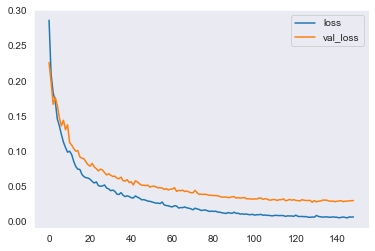

In [85]:
history = model.fit(
    X_train_SMT_wr, y_train_SMT_wr,
    validation_data=(X_test_wr, y_test_wr),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Findings :

- For the 10 best features, the data variance filter looks normal
- The decrease in loss is balanced by a decrease in val_los which indicates the data is not overfitting or underfitting
- The Wrapper feature selection is much better than Random Forest Classifier, Fiter Variances, and KBest

### Checking Correlation

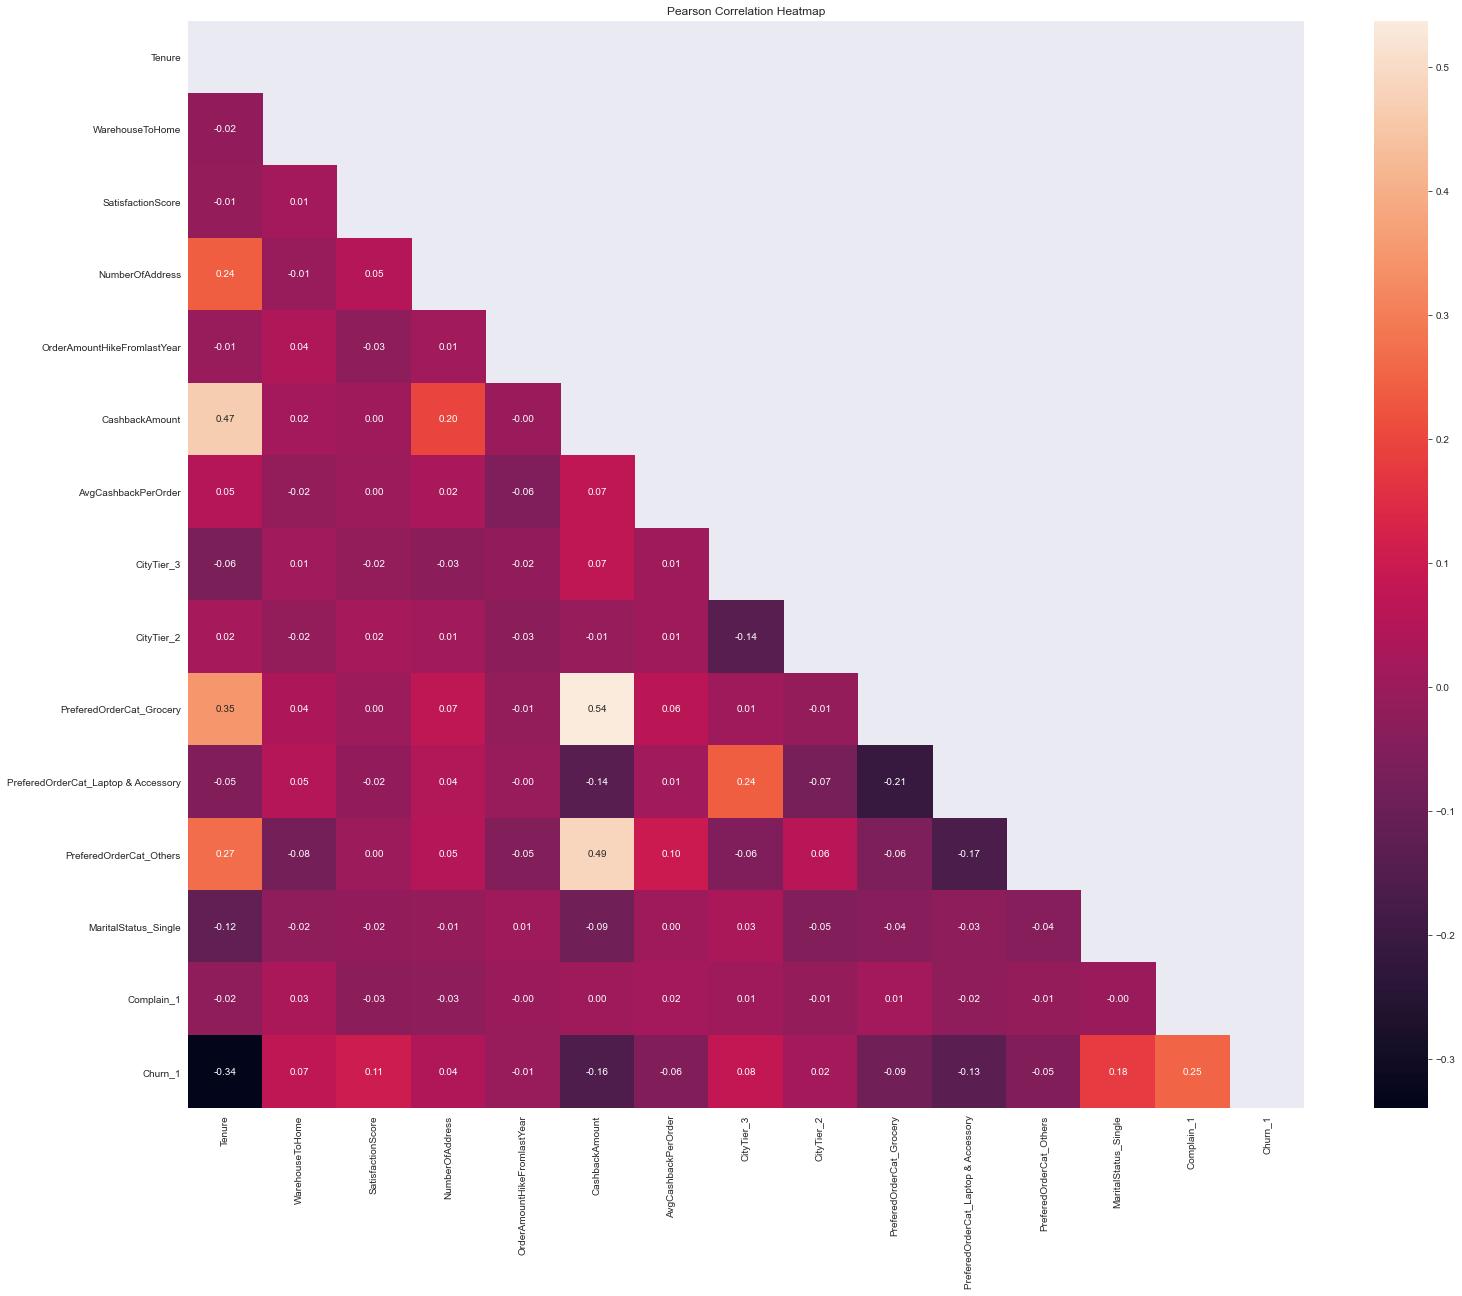

In [86]:
df_corr = df_Wrapper.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Findings :
- Based on checking all features selection, the least overfitting and relevant data is in the Wrapper
- So, for modeling we will use features that have been selected by using Wrapper

In [87]:
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

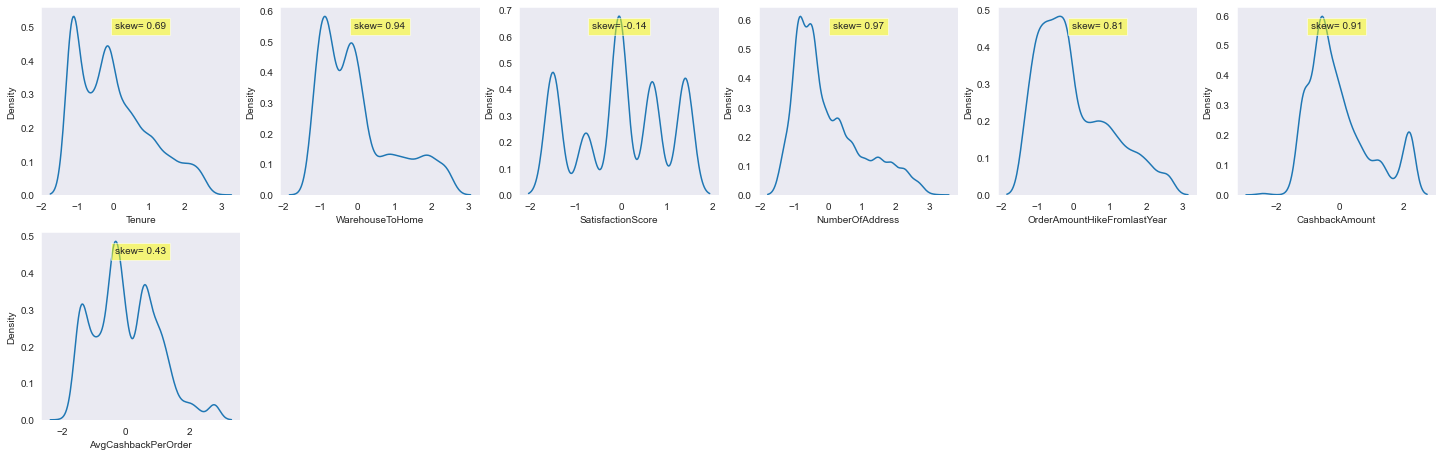

In [88]:
dist_plot(df_scaler_wr, num_3)

In [89]:
df_Wrapper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               5630 non-null   float64
 1   WarehouseToHome                      5630 non-null   float64
 2   SatisfactionScore                    5630 non-null   float64
 3   NumberOfAddress                      5630 non-null   float64
 4   OrderAmountHikeFromlastYear          5630 non-null   float64
 5   CashbackAmount                       5630 non-null   float64
 6   AvgCashbackPerOrder                  5630 non-null   float64
 7   CityTier_3                           5630 non-null   uint8  
 8   CityTier_2                           5630 non-null   uint8  
 9   PreferedOrderCat_Grocery             5630 non-null   uint8  
 10  PreferedOrderCat_Laptop & Accessory  5630 non-null   uint8  
 11  PreferedOrderCat_Others       

## Logistic Regression

In [90]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_SMT_wr, y_train_SMT_wr)
lr_preds = lr_model.predict(X_test_wr)
ytrain_predict_1 = lr_model.predict(X_train_SMT_wr)

### Evaluation

### Train

In [91]:
print('Train_score_LR :', lr_model.score(X_train_SMT_wr, y_train_SMT_wr))

Train_score_LR : 0.808459128453432


In [92]:
print('LR_AUC_TRAIN :',roc_auc_score(y_train_SMT_wr, ytrain_predict_1))

LR_AUC_TRAIN : 0.808459128453432


### Test

In [93]:
print('Akurasi :',accuracy_score(y_test_wr, lr_preds))

Akurasi : 0.7826704545454546


In [94]:
print('LR_AUC :',roc_auc_score(y_test_wr, lr_preds))

LR_AUC : 0.7936200802084121


In [95]:
cm_lr_1 = confusion_matrix(y_test_wr, lr_preds)

#PLOT THE MATRIX

import plotly.figure_factory as ff
x_1_plot = ['No Churn', 'Churn']
y_1_plot = ['No Churn','Churn']
fig = ff.create_annotated_heatmap(cm_lr_1, x=x_1_plot,y=y_1_plot)
fig.update_layout(height=400, width=500,title_text="Logistic Regression Confusion Matrix")
fig.show()

In [96]:
print(classification_report(y_test_wr, lr_preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1171
           1       0.42      0.81      0.56       237

    accuracy                           0.78      1408
   macro avg       0.69      0.79      0.71      1408
weighted avg       0.86      0.78      0.81      1408



## Decision Tree Classifier

In [97]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_SMT_wr, y_train_SMT_wr)
dt_preds = dt_model.predict(X_test_wr)
ytrain_predict_2 = dt_model.predict(X_train_SMT_wr)

### Evaluation

### Train

In [98]:
print('Train_Score_Dt :', dt_model.score(X_train_SMT_wr, y_train_SMT_wr))

Train_Score_Dt : 1.0


In [99]:
print('DT_AUC_TRAIN :',roc_auc_score(y_train_SMT_wr, ytrain_predict_2))

DT_AUC_TRAIN : 1.0


### Test

In [100]:
print('Akurasi :',accuracy_score(y_test_wr, dt_preds))

Akurasi : 0.9509943181818182


In [101]:
print('DT_AUC :',roc_auc_score(y_test_wr, dt_preds))

DT_AUC : 0.9234218652599567


In [102]:
cm_dt = confusion_matrix(y_test_wr, dt_preds)

#PLOT THE MATRIX

import plotly.figure_factory as ff
x_1_plot = ['No Churn', 'Churn']
y_1_plot = ['No Churn','Churn']
fig = ff.create_annotated_heatmap(cm_dt, x=x_1_plot,y=y_1_plot)
fig.update_layout(height=400, width=500,title_text="Decision Tree Confusion Matrix")
fig.show()

In [103]:
print(classification_report(y_test_wr, dt_preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1171
           1       0.84      0.88      0.86       237

    accuracy                           0.95      1408
   macro avg       0.91      0.92      0.91      1408
weighted avg       0.95      0.95      0.95      1408



## Random Forest Classifier

In [104]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_SMT_wr, y_train_SMT_wr)
rf_preds = rf_model.predict(X_test_wr)
ytrain_predict_3 = rf_model.predict(X_train_SMT_wr)

### Evaluation

### Train

In [105]:
print('Train_Score_Rf :', rf_model.score(X_train_SMT_wr, y_train_SMT_wr))

Train_Score_Rf : 1.0


In [106]:
print('RF_AUC_TRAIN :',roc_auc_score(y_train_SMT_wr, ytrain_predict_3))

RF_AUC_TRAIN : 1.0


## Test

In [107]:
print('Akurasi :',accuracy_score(y_test_wr, rf_preds))

Akurasi : 0.9694602272727273


In [108]:
print('RF_AUC :',roc_auc_score(y_test_wr, rf_preds))

RF_AUC : 0.9446198027579299


In [109]:
cm_rf = confusion_matrix(y_test_wr, rf_preds)

#PLOT THE MATRIX

import plotly.figure_factory as ff
x_1_plot = ['No Churn', 'Churn']
y_1_plot = ['No Churn','Churn']
fig = ff.create_annotated_heatmap(cm_rf, x=x_1_plot,y=y_1_plot)
fig.update_layout(height=400, width=500,title_text="Random Forest Classifier Confusion Matrix")
fig.show()

In [110]:
print(classification_report(y_test_wr, rf_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1171
           1       0.91      0.91      0.91       237

    accuracy                           0.97      1408
   macro avg       0.95      0.94      0.95      1408
weighted avg       0.97      0.97      0.97      1408



## XGB Classifier

In [111]:
xg_model = XGBClassifier(random_state=42)
xg_model.fit(X_train_SMT_wr, y_train_SMT_wr)
xg_preds = xg_model.predict(X_test_wr)
ytrain_predict_4 = xg_model.predict(X_train_SMT_wr)

[21:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation

### Train

In [112]:
print('Train_Score_Rf :', xg_model.score(X_train_SMT_wr, y_train_SMT_wr))

Train_Score_Rf : 0.9995727712902307


In [113]:
print('XGB_AUC_TRAIN :',roc_auc_score(y_train_SMT_wr, ytrain_predict_4))

XGB_AUC_TRAIN : 0.9995727712902307


### Test

In [114]:
print('Akurasi :',accuracy_score(y_test_wr, xg_preds))

Akurasi : 0.9701704545454546


In [115]:
print('XGB_AUC :',roc_auc_score(y_test_wr, xg_preds))

XGB_AUC : 0.9433640690815669


In [116]:
cm_xg = confusion_matrix(y_test_wr, xg_preds)

#PLOT THE MATRIX

import plotly.figure_factory as ff
x_1_plot = ['No Churn', 'Churn']
y_1_plot = ['No Churn','Churn']
fig = ff.create_annotated_heatmap(cm_rf, x=x_1_plot,y=y_1_plot)
fig.update_layout(height=400, width=500,title_text="XGB Classifier")
fig.show()

In [117]:
print(classification_report(y_test_wr, xg_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1171
           1       0.92      0.90      0.91       237

    accuracy                           0.97      1408
   macro avg       0.95      0.94      0.95      1408
weighted avg       0.97      0.97      0.97      1408



## ROC AUC Curve

### Train

In [118]:
model_lr = LogisticRegression().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_lr = model_lr.predict_proba(X_train_SMT_wr)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_dt = model_dt.predict_proba(X_train_SMT_wr)[:, 1]

model_rf = RandomForestClassifier().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_rf = model_rf.predict_proba(X_train_SMT_wr)[:, 1]

model_xg = XGBClassifier().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_xg = model_xg.predict_proba(X_train_SMT_wr)[:, 1]

[21:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [119]:
y_train_res = pd.Series(y_train_SMT_wr)

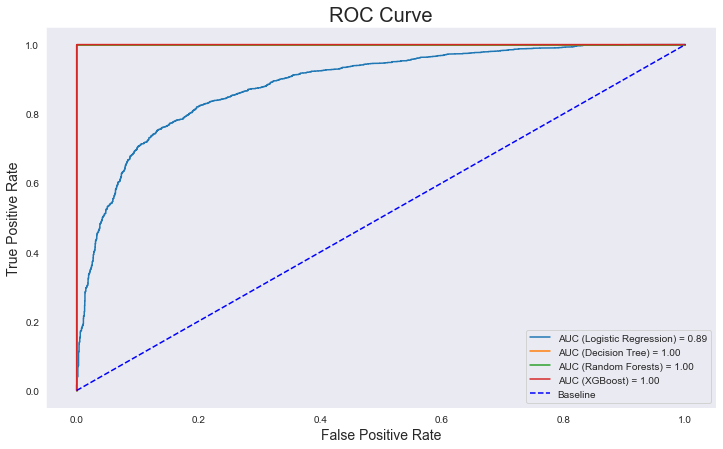

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_train_res.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_dt)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_xg = roc_auc_score(y_test_int, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Test

In [121]:
model_lr = LogisticRegression().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_lr = model_lr.predict_proba(X_test_wr)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_dt = model_dt.predict_proba(X_test_wr)[:, 1]

model_rf = RandomForestClassifier().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_rf = model_rf.predict_proba(X_test_wr)[:, 1]

model_xg = XGBClassifier().fit(X_train_SMT_wr, y_train_SMT_wr)
probs_xg = model_xg.predict_proba(X_test_wr)[:, 1]

[21:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


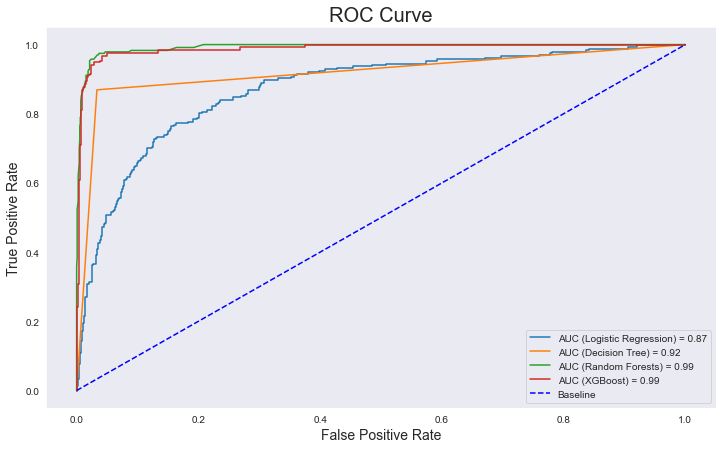

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test_wr.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_dt)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_xg = roc_auc_score(y_test_int, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

Findings : 
- Based on checking the ROC Curve, the best models are Random Forest Classifier and XGBoost which have a value of 99%.
- It can be seen that there is no significant difference in the ROC Curve from both Test and Train 
- This can also indicate that the model is not overfitting

## Model Conclusion

- The best model produced is the XGBoost with an accuracy of 97%
- The right model to use is the XGBoost
- When viewed from each evaluation carried out both from the test and train data, there is no significant difference
- So, the model is appropriate and not overfitting

## Feature Importance based on the best model

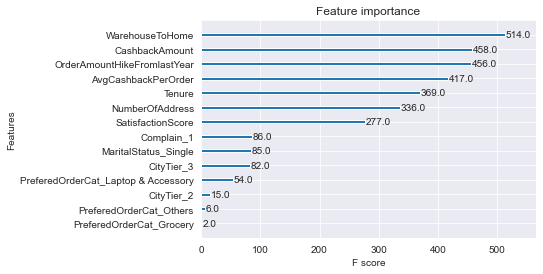

In [123]:
from xgboost import plot_importance

plot_importance(xg_model)

plt.show()

Findings :
- The features Importance use XGBoost plot importance and the features Importance of the best model can be used as a reference to reduce churn
- It should be noted that the best model obtained and the feature importance obtained can serve as a reference for evaluation in order to reduce the churn value
- The Number of Address feature or the total number of registered houses have an average value of users who churn higher than compared to customers who continue to use the app with an average value of 3-6
- This indicates that customers have many different home addresses and it appears that users who churn have a higher warehouse-to-home value compared to users who continue to use the app with an average value of 12-22
- The Warehouse To Home feature has a dominant value and is a very important feature of this model
- The distance from the warehouse to the house that is far away affects user churn so that an evaluation can be carried out related to shipping costs with that distance
- Based on the previous EDA, users who churn have an average score of 2-6 which indicates that new users churn very quickly
- Customers who Churn also often complain when compared to the previous EDA, users who churn and complain are far more than users who churn but do not complain
- The amount of cashback and the average cashback per order of churn users also tend to be lower than customer churn

In [124]:
feature_names = X_train_SMT_wr.columns

100%|===================| 6991/7022 [01:37<00:00]        

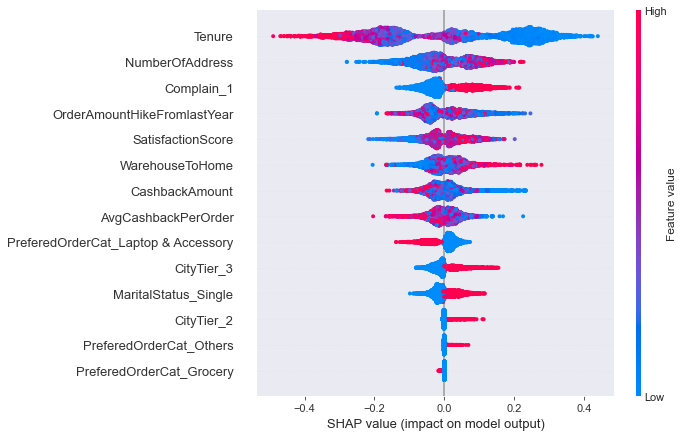

In [125]:
import shap

shap_values = shap.TreeExplainer(xg_model,
                                 data = X_train_SMT_wr,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_SMT_wr)
shap.summary_plot(shap_values, X_train_SMT_wr,feature_names = feature_names)

Findings :

- Based on checking using the best feature importance model with shape, it can also be used as a reference to reduce churn
- There needs to be improvements in terms of service or good customer service, even though users complain but handling can be fast so that customers feel comfortable
- Tenure can also be a focus especially on new users, good promos with high or frequent cashbacks can make users stay and create habit patterns in users
- Improvements to product categories can be made to grocery, others, as well as laptops and accessories
- City tier 2 and 3 can be targetsmarket due to customers in City tier 2 and 3 is relatively small so it can reduce the value ofchurn on City tier 2 and 3


Notes : 
- Red indicates high feature value (churn)
- Blue indicates low feature value (no churn)

## Conclusion

- The best model that can be used is the Random Forest Classifier with a prediction accuracy of 97%
- There needs to be improvements according to the importance of features based on the best model in order to reduce the churn value
- The model can be used as a reference and prediction to determine the development of churn after improvement 


## Recommendation

- The e-commerece needs to create promotion at new users, because customers churn very quickly in tenure
- For long-standing customers,if that is certainly a concernbefore, so it's better for old customersgiven a program that makes customers comfortable or feel appreciated (exp: platinum service loyalty)
- There are need to be an improvement in the distance of the delivery of goods so that the delivery of goods become easier and cheaper, such as making a delivery checkpoint